In [27]:
import os
import numpy as np
import nibabel as nib
from pathlib import Path
import pandas as pd


In [28]:
data_path = Path('Prostate158')
train_df = pd.read_csv(data_path / 'train.csv', index_col="ID")
test_df = pd.read_csv(data_path / 'test.csv', index_col="ID")
valid_df = pd.read_csv(data_path / 'valid.csv', index_col="ID")
interrater_df = pd.read_csv(data_path / 'interrater.csv', index_col="ID")
df = pd.concat([train_df, test_df, valid_df], axis=0)
df.head()

,t2,adc,dwi,t2_anatomy_reader1,t2_tumor_reader1,adc_tumor_reader1,t2_anatomy_reader2,adc_tumor_reader2
ID,,,,,,,,
24,train/024/t2.nii.gz,train/024/adc.nii.gz,train/024/dwi.nii.gz,train/024/t2_anatomy_reader1.nii.gz,NaN,train/024/empty.nii.gz,NaN,NaN
25,train/025/t2.nii.gz,train/025/adc.nii.gz,train/025/dwi.nii.gz,train/025/t2_anatomy_reader1.nii.gz,train/025/t2_tumor_reader1.nii.gz,train/025/adc_tumor_reader1.nii.gz,NaN,train/025/adc_tumor_reader2.nii.gz
26,train/026/t2.nii.gz,train/026/adc.nii.gz,train/026/dwi.nii.gz,train/026/t2_anatomy_reader1.nii.gz,NaN,train/026/empty.nii.gz,NaN,NaN
27,train/027/t2.nii.gz,train/027/adc.nii.gz,train/027/dwi.nii.gz,train/027/t2_anatomy_reader1.nii.gz,train/027/t2_tumor_reader1.nii.gz,train/027/adc_tumor_reader1.nii.gz,NaN,train/027/adc_tumor_reader2.nii.gz
28,train/028/t2.nii.gz,train/028/adc.nii.gz,train/028/dwi.nii.gz,train/028/t2_anatomy_reader1.nii.gz,NaN,train/028/empty.nii.gz,NaN,NaN


In [29]:
print(df.shape)
df.isnull().sum()

(158, 8)


t2                      0
adc                     0
dwi                     0
t2_anatomy_reader1      0
t2_tumor_reader1       57
adc_tumor_reader1       0
t2_anatomy_reader2    139
adc_tumor_reader2      72
dtype: int64

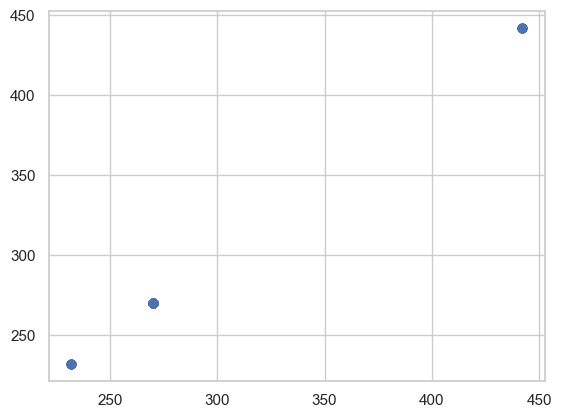

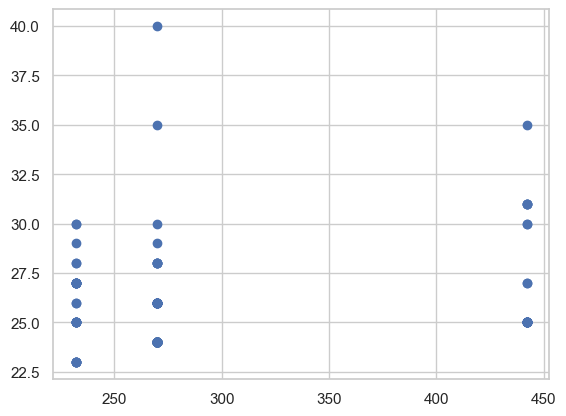

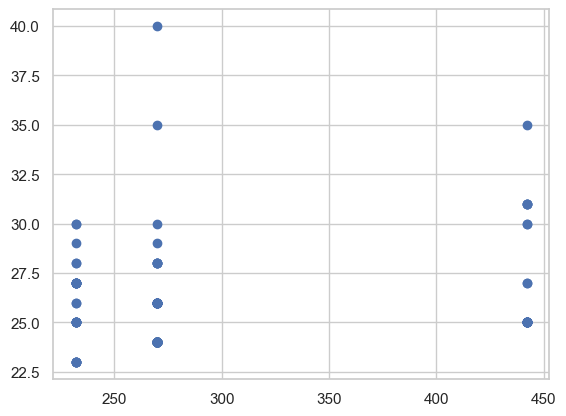

In [30]:
# create df_sizes from df and change paths to sizes
image_sizes = list(df["t2"].apply(lambda x: nib.load("Prostate158/"+x).shape))
image_x = [x[0] for x in image_sizes]
image_y = [x[1] for x in image_sizes]
image_z = [x[2] for x in image_sizes]

# this variable lists of tuples of 3 ints
# lets visualize it using matplotlib for x, y, z axes
# there are not much data points, lets use scatter plot i want to see every point
import matplotlib.pyplot as plt

plt.scatter(image_x, image_y)
plt.show()

plt.scatter(image_x, image_z)
plt.show()

plt.scatter(image_y, image_z)
plt.show()

In [34]:
train_folder = data_path / 'train'
test_folder = data_path / 'test'
valid_folder = data_path / 'valid'

def print_shapes(folder):
    for patient in os.listdir(folder):
        print("Patient No: ", patient, end=' ')
        shapes = []
        for file in os.listdir(folder / patient):
            img = nib.load(folder / patient / file)
            shapes.append(img.shape)
        if (all([shape == shapes[0] for shape in shapes])):
            print('OK')
        else:
            print('Shapes are not the same')

print_shapes(train_folder)
print_shapes(test_folder)
print_shapes(valid_folder)


Patient No:  024 OK
Patient No:  025 OK
Patient No:  026 OK
Patient No:  027 OK
Patient No:  028 OK
Patient No:  029 OK
Patient No:  030 OK
Patient No:  031 OK
Patient No:  032 OK
Patient No:  033 OK
Patient No:  034 OK
Patient No:  035 OK
Patient No:  036 OK
Patient No:  037 OK
Patient No:  039 OK
Patient No:  040 OK
Patient No:  042 OK
Patient No:  043 OK
Patient No:  044 OK
Patient No:  045 OK
Patient No:  048 OK
Patient No:  049 OK
Patient No:  050 OK
Patient No:  052 OK
Patient No:  053 OK
Patient No:  054 OK
Patient No:  055 OK
Patient No:  057 OK
Patient No:  058 OK
Patient No:  059 OK
Patient No:  062 OK
Patient No:  063 OK
Patient No:  064 OK
Patient No:  065 OK
Patient No:  066 OK
Patient No:  067 OK
Patient No:  068 OK
Patient No:  069 OK
Patient No:  070 OK
Patient No:  071 OK
Patient No:  072 OK
Patient No:  073 OK
Patient No:  074 OK
Patient No:  075 OK
Patient No:  076 OK
Patient No:  078 OK
Patient No:  079 OK
Patient No:  080 OK
Patient No:  081 OK
Patient No:  082 OK
